У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/yulu_rental.csv')
df[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

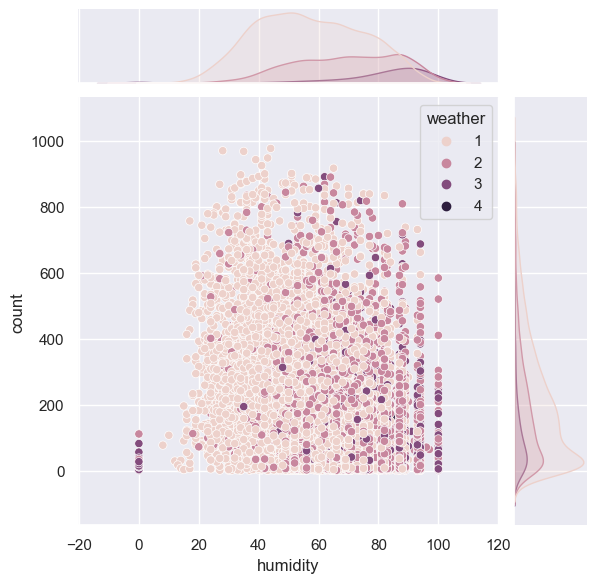

In [3]:
sns.set_theme()
sns.jointplot(data = df, x ='humidity', y ='count', hue = 'weather');

Згідно графіку можна сказати що між вологістю і кількістю взятих велосипедів в оренду як такої залежності не спостерігається, але можна прослідкувати скупчення точок в інтервалі вологості 20-80 і при хорошій погоді (індекс 1), з чого і випливає що саме такі умови комфортні для оренди велосипедів - оскільки при таких умовах показники взятих в оренду велосипедів варьюються в діапазоні 200-800. І навпаки в погану дощову погоду і великий відсоток вологості спостерігається низька активність користувачів і навіть дні коли зовсім відсутня оренда велосипедів.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [4]:
warm_season_data = df[(df['season'] == 1) | (df['season'] == 2)]
warm_season_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8146,2012-06-19 19:00:00,2,0,1,1,32.80,38.635,59,15.0013,82,432,514
8147,2012-06-19 20:00:00,2,0,1,1,32.80,37.880,55,16.9979,59,399,458
8148,2012-06-19 21:00:00,2,0,1,1,31.16,35.605,62,11.0014,37,239,276
8149,2012-06-19 22:00:00,2,0,1,1,29.52,34.850,79,6.0032,51,240,291


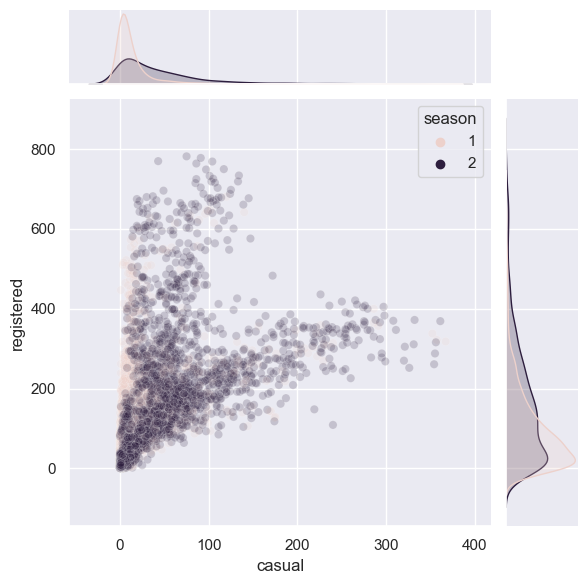

In [5]:
sns.jointplot(data = warm_season_data, x = 'casual', y='registered', hue = 'season', alpha =.2);

Можемо побачити що зареєстрованих користувачів в нас є більше, їх діапазон сягає 800, що може свідчити про те що люди зацікавлені в нашому продукті, їм подобається і вони хочуть і в подальшому ним користуватися. 

Весною в нас дуже мала кількість неформальних користувачів і основний відсоток користувачів які користуються послугами є зареєстрованими. Літом ж навпаки діапазон неформальних користувачів  збільшується до 350, що може свідчити про сезонну популярність, більше людей відпочивають, їздять з друзями і не планують використовувати цей транспорт на постійній основі.

В такому випадку можна придумати маркетингові стратегії для перетворення неформальних користувачів в зареєстрованих. Впровадити пропозиції вихідного дня в несезон. 

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


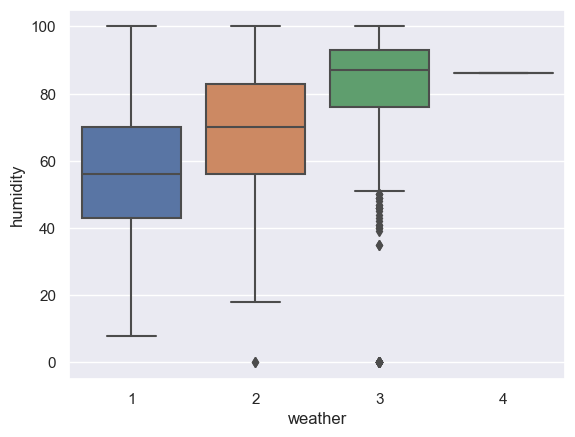

In [6]:
sns.boxplot(data = df, x = 'weather', y ='humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [9]:
import warnings
warnings.filterwarnings('ignore')

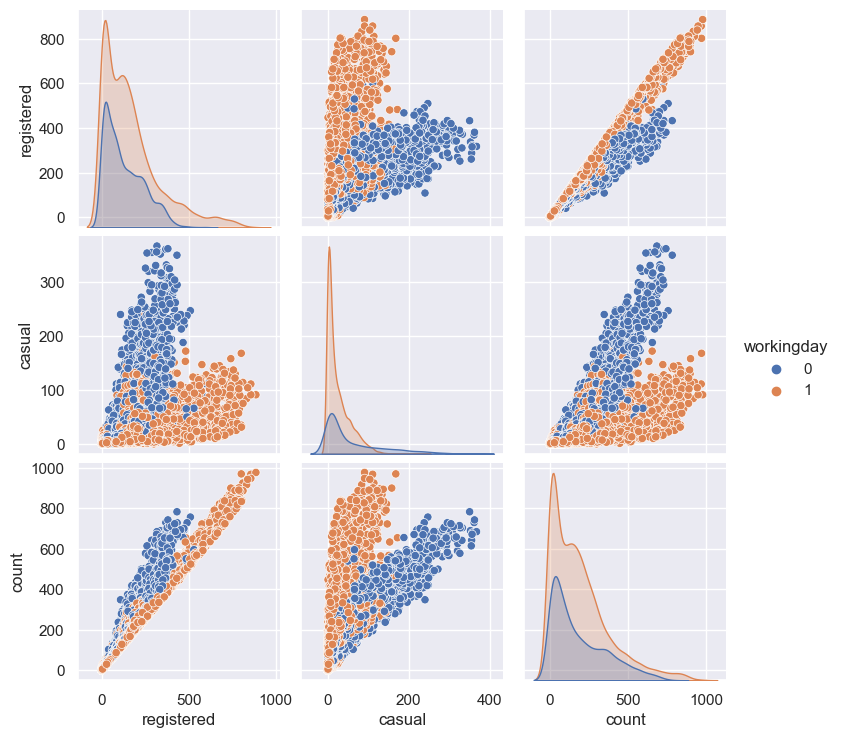

In [10]:
filtred_data = df[['registered', 'casual', 'count', 'workingday']]
sns.pairplot (data = filtred_data, hue = 'workingday' );

Згідно графіків в нас зареєстрованих користувачів більше в робочий день, а неформальних користувачів - у вихідний або святкові дні. 
В зареєстрованих користувачів у робочі дні кількість взятих на прокат велосипедів більша ніж у вихідні, це може свідчити про популярність серед них сервісу саме для добирання на навчання, роботу, школу, а у вихідний відповідно їх активність зменшується оскільки використовують для відпочинку або доізду з пункту А в пункт Б по своїм справам. 
Що стосується неформальних користувачів, то наш сервіс користується популярністю і у вихідні і в святкові дні. В робочий день вони орендують більшу кількість велосипедів, це може бути пов'язано з якимись терміновими справами коли треба швидко без заторів дістатися до пункту призначення, а наші станції зручно розташовані для цього і варіант доїхати на велосипеді буде швидшим ніж на решті видів транспорту. А у вихідні - сама кількість неформальних користувачів зростає, можливо через те що використовують для дозвілля зі знайомим або друзями які можуть бути нашими зареєстрованими користувачами, але неформальний юзер не є активним, і в подальшому використовувати наш сервіс не планує. 

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [11]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [12]:
df['date'] = df.datetime.dt.date

In [27]:
df_viz = df[['date', 'registered', 'casual']].groupby('date').sum()
df_viz.set_index('date', inplace=True)

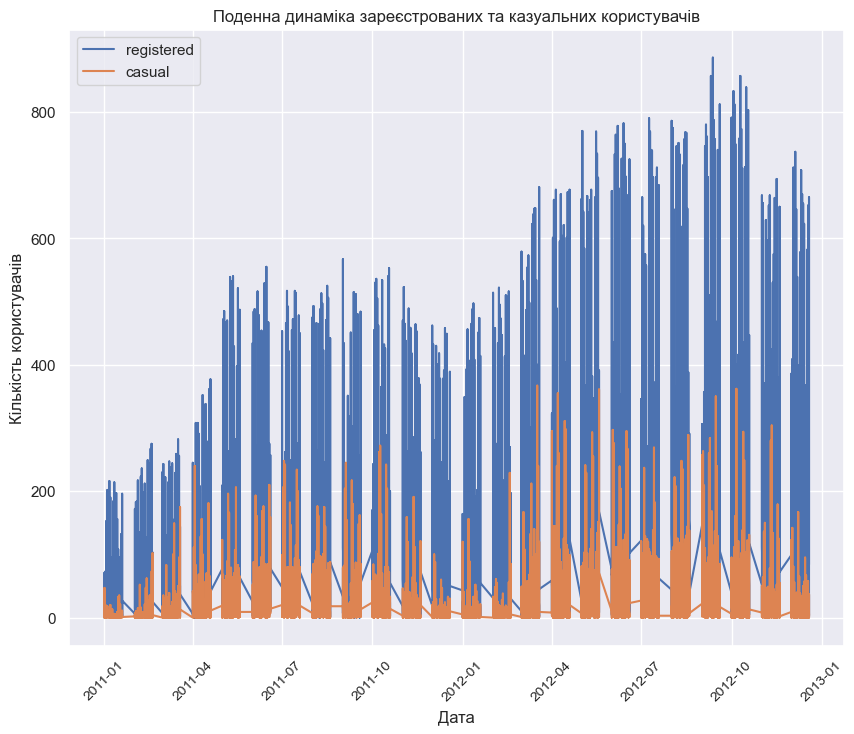

In [43]:
df_viz.plot(figsize =(10,8))
plt.title('Поденна динаміка зареєстрованих та казуальних користувачів')
plt.xlabel('Дата')
plt.ylabel('Кількість користувачів')
plt.xticks(rotation=45, fontsize=10, horizontalalignment='center');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
